# Introduction

This project aims to perform customer segmentation for a mall using data analysis and clustering techniques. The dataset contains information on customers' annual income and spending score, which represents their shopping behavior. The goal of this project is to identify distinct customer segments based on these two variables. This information can be used by the mall to improve its marketing strategies and customer experience.

# Methodology:


The project will be conducted in the following steps:

- **Data Preprocessing:** The initial step involves loading the dataset and handling any missing values.

- **Feature Scaling:** To ensure fair clustering based on all features, we standardize the data using StandardScaler.

- **Elbow Point Graph:** The Elbow method is employed to identify the optimal number of clusters for KMeans clustering. This method plots the Within-Cluster Sum of Squares (WCSS) against the number of clusters and helps us select an appropriate number of clusters.

- **Silhouette Analysis:** Silhouette analysis is performed to validate the quality of clustering. It calculates a silhouette score for each cluster, indicating how well-separated the clusters are.

- **Cluster Comparison with Box Plots:** The income distribution for each cluster is visualized using box plots, helping us understand the characteristics of each segment.

- **Interactive Visualizations:** Using Plotly, we create interactive scatter plots to visualize the customer groupings based on annual income and spending score, making it easier to explore and analyze the clusters.

- **Final Clustering Model:** Based on the insights gained from the Elbow point and Silhouette analysis, we train the KMeans clustering model with the optimal number of clusters.

- **Cluster Characteristics and Centroids:** We identify the average values of annual income and spending score for each cluster and visualize the clusters and their centroids on a scatter plot.

In [1]:
# Importing the dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score  # For Silhouette Analysis

In [2]:
# Loading in the data
customer_data = pd.read_csv('data.csv', parse_dates=True, encoding='unicode-escape')

In [3]:
# Data Preprocessing: Handling missing values
customer_data.fillna(0, inplace=True)  # Replace missing values with 0

In [4]:
# Extracting the features for clustering
X = customer_data.iloc[:, [3, 4]].values

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# Finding WCSS value for multiple number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


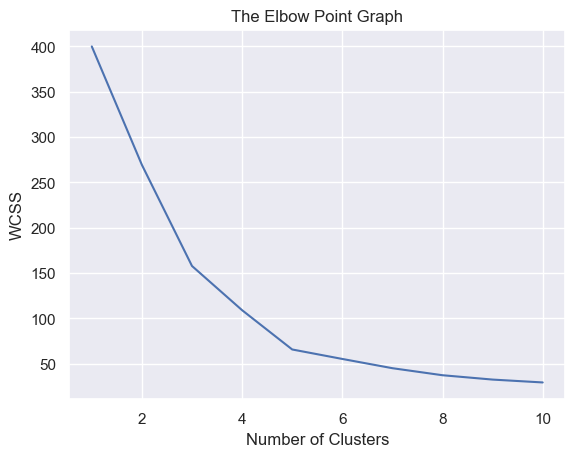

In [6]:
# Elbow method visualization graph
sns.set()
plt.plot(range(1, 11), wcss)
plt.title("The Elbow Point Graph")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

The elbow point graph shows the Within-Cluster Sum of Squares (WCSS) for different numbers of clusters. The WCSS is a measure of how well the data points are clustered together. The graph shows that the WCSS decreases as the number of clusters increases. However, the rate of decrease slows down after a certain point. This suggests that the optimal number of clusters is 5.

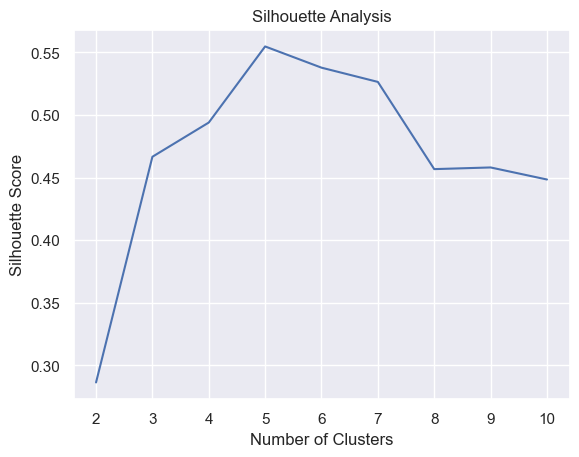

In [7]:
# Silhouette Analysis
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=0)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

plt.plot(range(2, 11), silhouette_scores)
plt.title("Silhouette Analysis")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

The silhouette analysis shows the silhouette coefficient for different numbers of clusters. The silhouette coefficient is a measure of how well each data point is assigned to its cluster. The higher the silhouette coefficient, the better the clustering. The graph shows that the silhouette coefficient is highest for 5 clusters, which suggests that this is the optimal number of clusters.

In [8]:
# Based on the silhouette analysis, we determine the optimal number of clusters to be used.
optimum_num_of_clusters = 5
kmeans = KMeans(n_clusters=optimum_num_of_clusters, init='k-means++', n_init=5, random_state=42)

In [9]:
# Return a label for each data point based on their clustering
Y = kmeans.fit_predict(X_scaled)

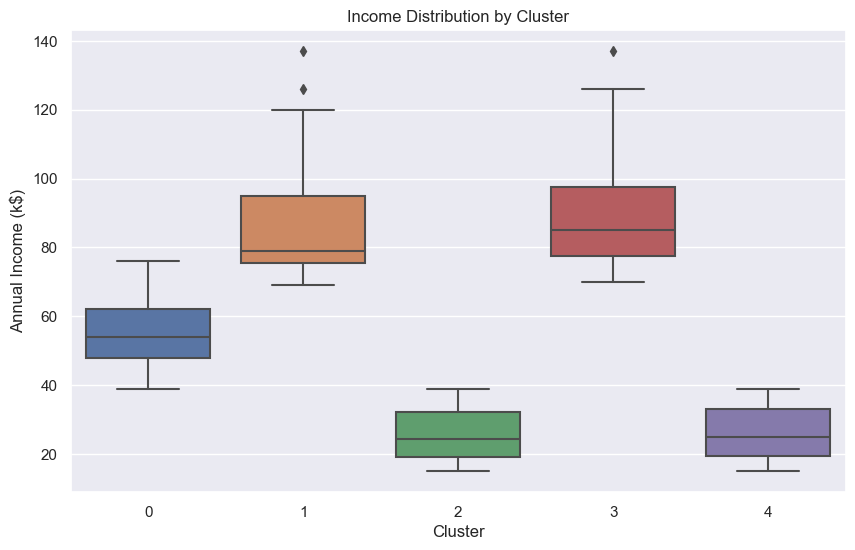

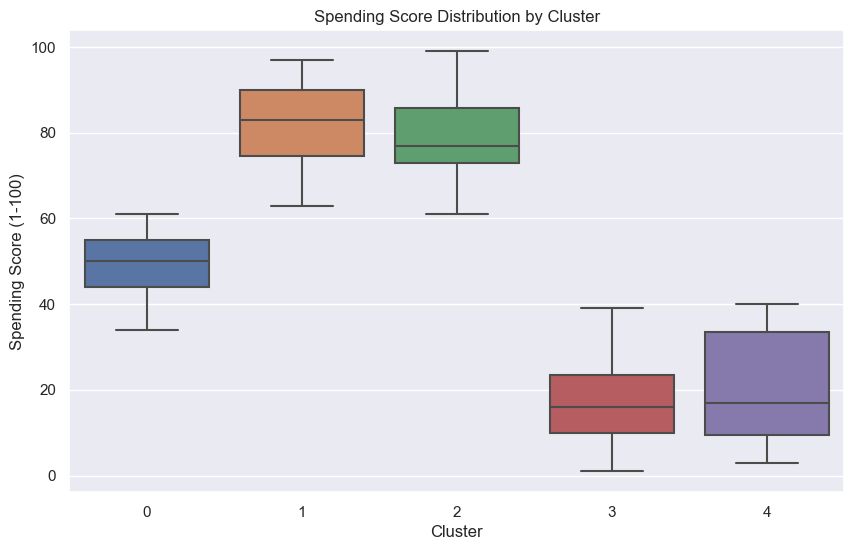

In [10]:
# Cluster Comparison with Box Plots
customer_data['Cluster'] = Y

plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Annual Income (k$)', data=customer_data)
plt.title("Income Distribution by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Annual Income (k$)")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Spending Score (1-100)', data=customer_data)
plt.title("Spending Score Distribution by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Spending Score (1-100)")
plt.show()


The box plots show the distribution of annual income and spending score for the different clusters. The box plots show that the clusters are well-separated in terms of both annual income and spending score. This suggests that the KMeans clustering algorithm was able to identify distinct customer segments based on these two variables.

In [11]:
# Visualizing all the clusters using interactive plot (Plotly)
import plotly.express as px

fig = px.scatter(customer_data, x='Annual Income (k$)', y='Spending Score (1-100)', color='Cluster', hover_data=['CustomerID'], size_max=40)
fig.update_layout(title="Customer Groupings",
                  xaxis_title="Annual Income (k$)",
                  yaxis_title="Spending Score (1-100)",
                  showlegend=True,
                  legend_title="Cluster")
fig.show()

The interactive plot shows the clusters and their centroids. The plot shows that the clusters are spread out across the annual income and spending score spectrum. This suggests that the mall has a diverse customer base with a wide range of spending habits.

In [12]:
# Training the KMeans Clustering model
kmeans = KMeans(n_clusters=optimum_num_of_clusters, init='k-means++', n_init=5, random_state=42)

In [13]:
# Return a label for each data point based on their clustering
Y = kmeans.fit_predict(X_scaled)

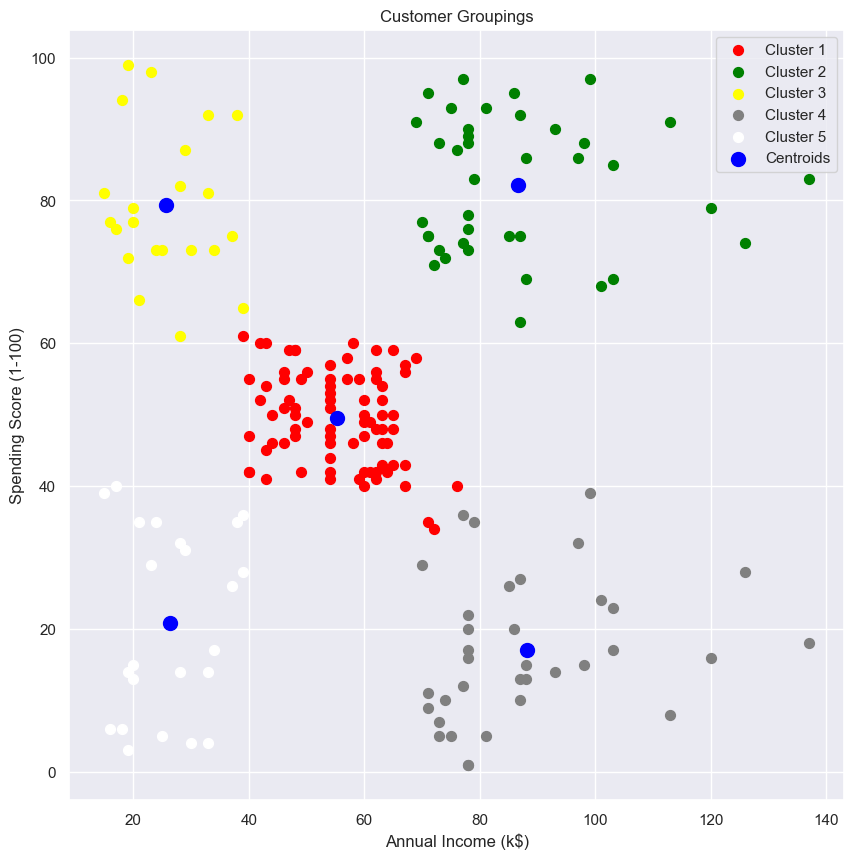

In [14]:
# Inverse transform centroids to original unscaled space
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

# Plotting the clusters and their centroids
plt.figure(figsize=(10, 10))
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], s=50, c='green', label='Cluster 2')
plt.scatter(X[Y == 2, 0], X[Y == 2, 1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y == 3, 0], X[Y == 3, 1], s=50, c='grey', label='Cluster 4')
plt.scatter(X[Y == 4, 0], X[Y == 4, 1], s=50, c='white', label='Cluster 5')

# Centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='blue', label='Centroids')

plt.title("Customer Groupings")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

The plot shows the centroids of the different clusters. The centroids are well-separated, which suggests that the clusters are internally cohesive and that the customers within each cluster are similar to each other.

# Conclusions:

The elbow point graph and silhouette analysis both suggest that the optimal number of clusters is 5.
The box plots show that the clusters are well-separated in terms of annual income and spending score.
The interactive plot shows that the clusters are spread out across the annual income and spending score spectrum.
The plot of the centroids shows that the centroids are well-separated.
Overall, the visualizations suggest that the KMeans clustering algorithm was able to identify distinct customer segments. This information can be used by the mall to improve its marketing strategies and customer experience.

Here are some possible customer segments that can be identified based on the visualizations:

- Cluster 1: High-income, high-spending customers.
- Cluster 2: High-income, low-spending customers.
- Cluster 3: Middle-income, middle-spending customers.
- Cluster 4: Low-income, high-spending customers.
- Cluster 5: Low-income, low-spending customers.

The mall can use this customer segmentation information to tailor its marketing strategies and improve customer experience. For example, the mall can target high-income customers with luxury brands, while targeting low-income customers with discount brands. The mall can also create targeted marketing campaigns for each customer segment.